In [1]:
import mne
from mne.datasets import sample
import matplotlib.pyplot as plt
import mayavi.mlab as mlab


data_path = sample.data_path()

# the raw file containing the channel location + types
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
# The paths to Freesurfer reconstructions
subjects_dir = data_path + '/subjects'
subject = 'sample'

In [2]:
# The transformation file obtained by coregistration
trans = data_path + '/MEG/sample/sample_audvis_raw-trans.fif'

info = mne.io.read_info(raw_fname)
# Here we look at the dense head, which isn't used for BEM computations but
# is useful for coregistration.
fig = mne.viz.plot_alignment(
    info, trans, subject=subject, dig=True,
    meg=['helmet', 'sensors'],
    subjects_dir=subjects_dir,
    surfaces='head-dense')

    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
Using mayavi 3d backend.

Using lh.seghead for head surface.


/Users/dengeman/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Getting helmet for system 306m


In [4]:
mlab.savefig('tmp.png')


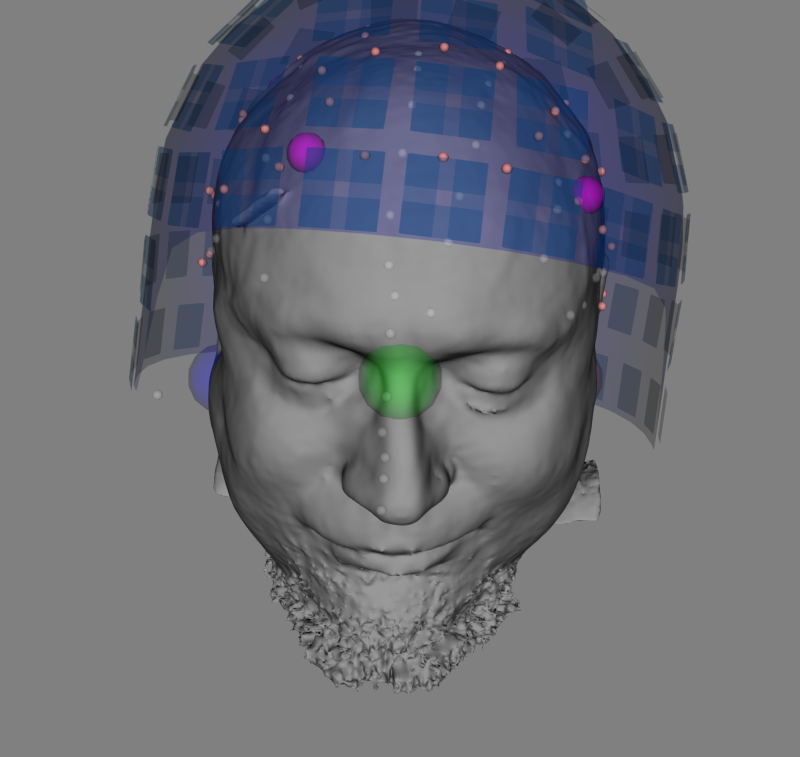

In [6]:
from IPython.display import Image
Image(filename='tmp.png', width=600)

In [7]:
mne.setup_source_space?

| subdivision grade | ico   | oct  |
|-------------------|-------|------|
| 1                 | 42    | 6    |
| 2                 | 162   | 18   |
| 3                 | 642   | 66   |
| 4                 | 2562  | 258  |
| 5                 | 10242 | 1026 |
| 6                 | 40962 | 4098 |

In [18]:
src = mne.setup_source_space(
    subject, spacing='oct6',
    subjects_dir=subjects_dir, add_dist=False)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/dengeman/mne_data/MNE-sample-data/subjects
Subject      = sample
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/dengeman/mne_data/MNE-sample-data/subjects/sample/surf/lh.white...
Mapping lh sample -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/dengeman/mne_data/MNE-sample-data/subjects/sample/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/155407 selected to source space (oct = 6)

Loading /Users/dengeman/mne_data/MNE-sample-data/subjects/sample/surf/rh.white...
Mapping rh sample -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/dengeman/mne_data/MNE-sample-data/subjects/sample/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 4098/156866 se

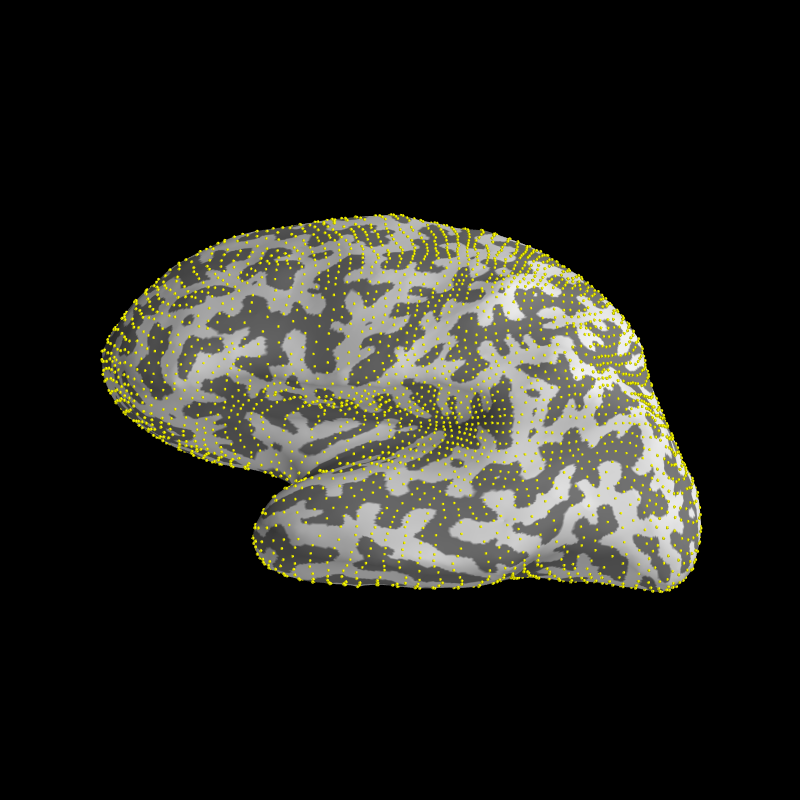

In [19]:
import numpy as np  # noqa
from surfer import Brain  # noqa

brain = Brain('sample', 'lh', 'inflated', subjects_dir=subjects_dir)
surf = brain.geo['lh']

vertidx = np.where(src[0]['inuse'])[0]

fig2 = mlab.points3d(surf.x[vertidx], surf.y[vertidx],
              surf.z[vertidx], color=(1, 1, 0), scale_factor=1.5)

mlab.savefig('fig2.png')
from IPython.display import Image
Image(filename='fig2.png', width=600)

In [40]:
# conductivity = (0.3,)  # for single layer
conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(subject='sample', ico=4,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 4th to 4th subdivision of an icosahedron (n_tri: 5120 -> 5120)
Going from 4th to 4th subdivision of an icosahedron (n_tri: 5120 -> 5120)
Going from 4th to 4th subdivision of an icosahedron (n_tri: 5120 -> 5120)
outer skin  CM is  -0.12  -0.14  22.79 mm
outer skull CM is   0.70  -9.88  44.01 mm
inner skull CM is   0.67 -10.01  44.26 mm
Checking that outer skull surface is inside outer skin  surface...
Checking that inner skull surface is inside outer skull surface...
Checking distance between outer skin  and outer skull surfaces...
Minimum distance between the outer skin  and outer skull surfaces is approximately    0.0 mm
Checking distance between outer skull and inner skull surfaces...
Minimum distance between the outer skull and inner skull surfaces is approximately    0.0 mm
Surfaces passed the basic topology checks.
Complete.

Approximation method : Linear collocation

Three-layer model surfaces loaded.
Computing the linear collocation soluti

In [21]:
bem

<ConductorModel  |  BEM (1 layer)>

Using surface: /Users/dengeman/mne_data/MNE-sample-data/subjects/sample/bem/inner_skull.surf
Using surface: /Users/dengeman/mne_data/MNE-sample-data/subjects/sample/bem/outer_skull.surf
Using surface: /Users/dengeman/mne_data/MNE-sample-data/subjects/sample/bem/outer_skin.surf


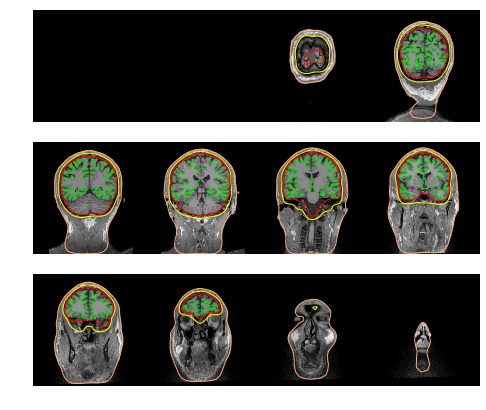

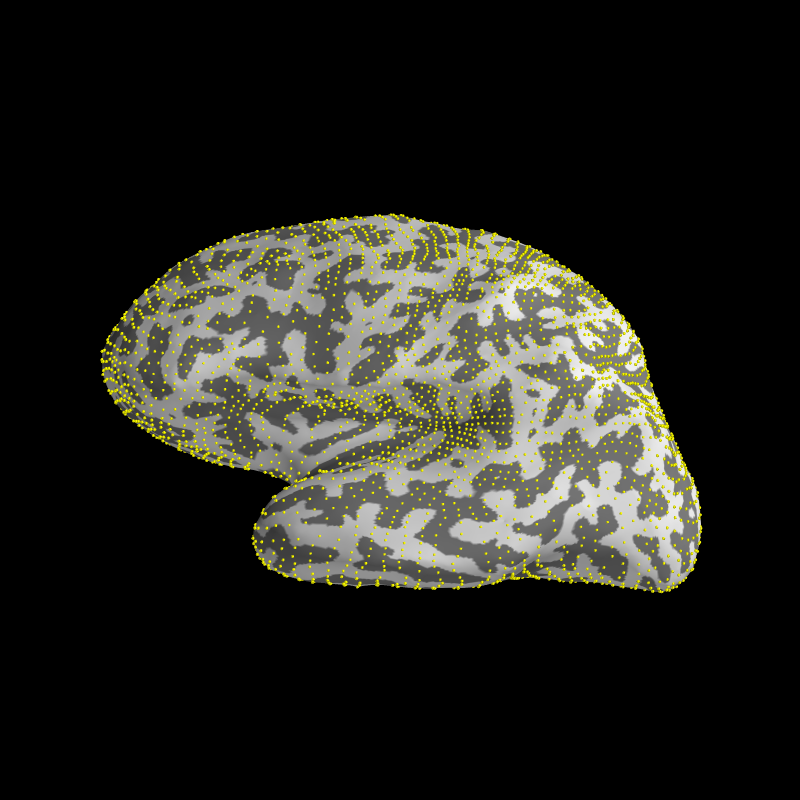

In [23]:
fig3 = mne.viz.plot_bem(subject=subject,
                 subjects_dir=subjects_dir,
                 brain_surfaces='white',
                 src=src,
                 orientation='coronal')


mlab.savefig('fig3.png')
Image(filename='fig3.png', width=600)

In [41]:
fwd = mne.make_forward_solution(
    raw_fname,
    trans=trans,
    src=src,
    bem=bem,
    meg=True,
    eeg=True,
    mindist=5.0,
    n_jobs=1)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=155407, n_used=4098, coordinate_frame=MRI (surface RAS)>, <surface (rh), n_vertices=156866, n_used=4098, coordinate_frame=MRI (surface RAS)>]>
MRI -> head transform : /Users/dengeman/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw-trans.fif
Measurement data      : sample_audvis_raw.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999310  0.009985 -0.035787      -3.17 mm
     0.012759  0.812405  0.582954       6.86 mm
     0.034894 -0.583008  0.811716      28.88 mm
     0.000000  0.000000  0.000000       1.00

Read 306 MEG channels from info
84 coil definitions read
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 mm


In [42]:
mne.convert_forward_solution(fwd, surf_ori=True, copy=False)
leadfield = fwd['sol']['data']
print("Leadfield size : %d x %d" % leadfield.shape)

    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 366 x 22494


In [43]:
grad_map = mne.sensitivity_map(fwd, ch_type='grad', mode='fixed')
mag_map = mne.sensitivity_map(fwd, ch_type='mag', mode='fixed')

    204 out of 366 channels remain after picking
    102 out of 366 channels remain after picking


Using control points [0.01984494 0.34093668 1.        ]


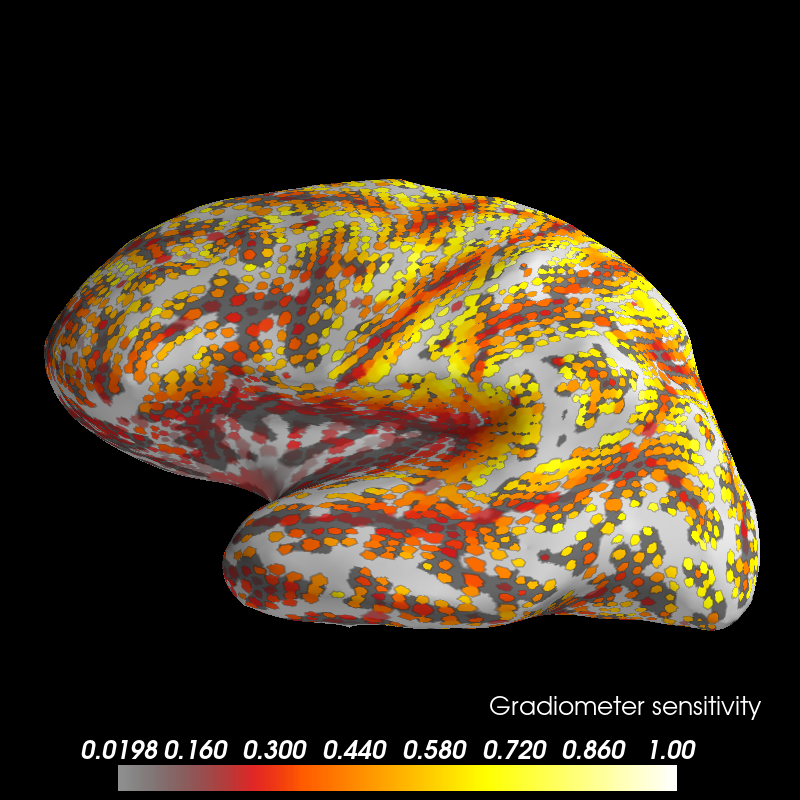

In [44]:
brain = grad_map.plot(
    time_label='Gradiometer sensitivity',
    subjects_dir=subjects_dir,
    clim=dict(lims=[0, 50, 100]),
    smoothing_steps=2)
brain.save_image('sens.png')
Image(filename='sens.png', width=600)

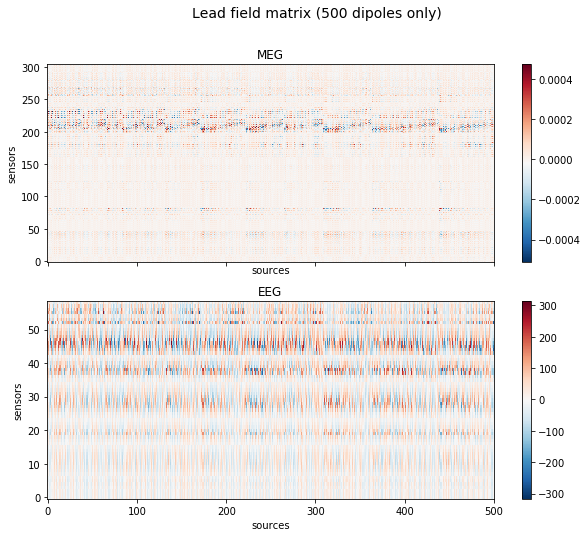

In [45]:
picks_meg = mne.pick_types(fwd['info'], meg=True, eeg=False)
picks_eeg = mne.pick_types(fwd['info'], meg=False, eeg=True)

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Lead field matrix (500 dipoles only)', fontsize=14)
for ax, picks, ch_type in zip(axes, [picks_meg, picks_eeg], ['meg', 'eeg']):
    im = ax.imshow(leadfield[picks, :500], origin='lower', aspect='auto',
                   cmap='RdBu_r')
    ax.set_title(ch_type.upper())
    ax.set_xlabel('sources')
    ax.set_ylabel('sensors')
    plt.colorbar(im, ax=ax, cmap='RdBu_r')
plt.show()

    60 out of 366 channels remain after picking
Adding average EEG reference projection.


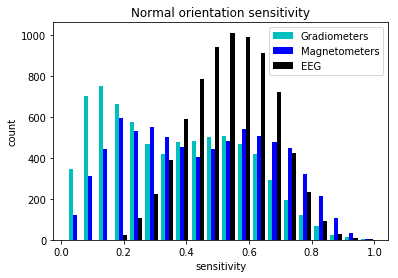

In [47]:
eeg_map = mne.sensitivity_map(fwd, ch_type='eeg', mode='fixed')

plt.figure()
plt.hist([grad_map.data.ravel(), mag_map.data.ravel(), eeg_map.data.ravel()],
         bins=20, label=['Gradiometers', 'Magnetometers', 'EEG'],
         color=['c', 'b', 'k'])
plt.legend()
plt.title('Normal orientation sensitivity')
plt.xlabel('sensitivity')
plt.ylabel('count')
plt.show()

In [49]:
import os.path as op
from mne.minimum_norm import make_inverse_operator, apply_inverse

In [50]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname)  # already has an average reference
events = mne.find_events(raw, stim_channel='STI 014')

event_id = dict(aud_l=1)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)
raw.info['bads'] = ['MEG 2443', 'EEG 053']
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                       exclude='bads')
baseline = (None, 0)  # means from the first instant to t = 0
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=baseline, reject=reject)

Opening raw data file /Users/dengeman/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
319 events found
Event IDs: [ 1  2  3  4  5 32]
72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
4 projection items activated


Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
17 bad epochs dropped
Computing data rank from raw with rank=None
Using tolerance 2.8e-09 (2.2e-16 eps * 305 dim * 4.2e+04 

/Users/dengeman/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
Number of samples used : 1705
log-likelihood on unseen data (descending order):
   shrunk: -1466.377
   empirical: -1574.608
selecting best estimator: shrunk
[done]


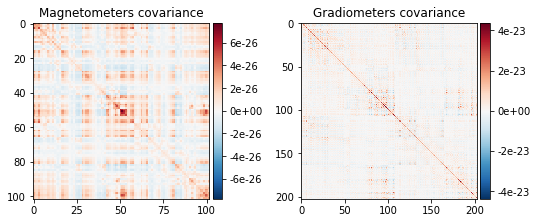

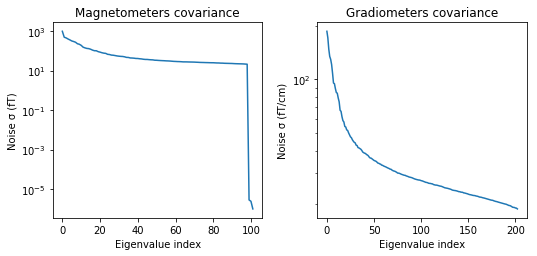

In [51]:
noise_cov = mne.compute_covariance(
    epochs, tmax=0.,
    method=['shrunk', 'empirical'],
    rank=None, verbose=True)

fig_cov, fig_spectra = mne.viz.plot_cov(noise_cov, raw.info)

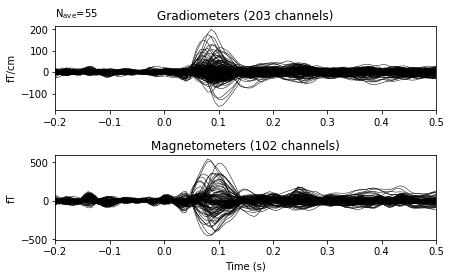

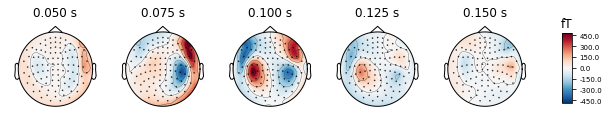

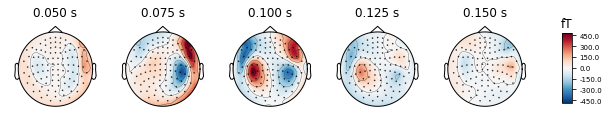

In [52]:
evoked = epochs.average().pick_types(meg=True)
evoked.plot(time_unit='s')
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='mag',
                    time_unit='s')


Computing data rank from covariance with rank=None
Using tolerance 1.6e-13 (2.2e-16 eps * 203 dim * 3.5 max  singular value)
estimated rank (grad): 203
    GRAD: rank 203 computed from 0s data channels with 203 projectors
Computing data rank from covariance with rank=None
Using tolerance 2.2e-14 (2.2e-16 eps * 102 dim * 0.97 max  singular value)
estimated rank (mag): 99
    MAG: rank 99 computed from 3s data channels with 102 projectors
    Created an SSP operator (subspace dimension = 3)
Computing data rank from covariance with rank={'grad': 203, 'mag': 99, 'meg': 302}
Setting small MEG eigenvalues to zero.
Not doing PCA for MEG.
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)


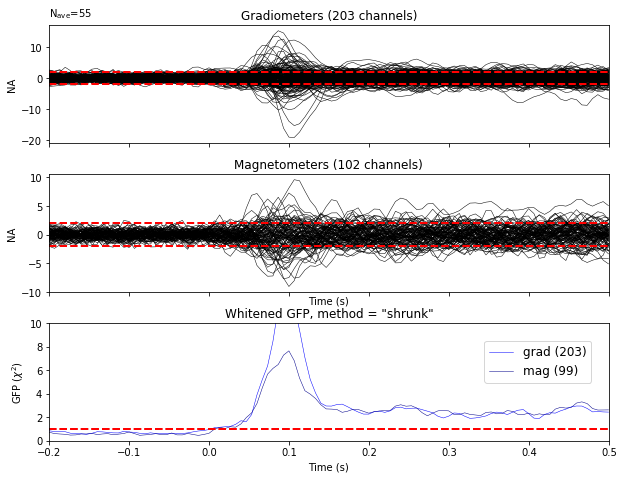

In [54]:

# Show whitening
evoked.plot_white(noise_cov, time_unit='s');

In [55]:

# make an MEG inverse operator
info = evoked.info
inverse_operator = make_inverse_operator(info, fwd, noise_cov,
                                         loose=0.2, depth=0.8)

Computing inverse operator with 305 channels.
    305 out of 366 channels remain after picking
Selected 305 channels
Creating the depth weighting matrix...
    203 planar channels
    limit = 7262/7498 = 10.020850
    scale = 2.58122e-08 exp = 0.8
Applying loose dipole orientations. Loose value of 0.2.
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing data rank from covariance with rank=None
Using tolerance 2.9e-13 (2.2e-16 eps * 305 dim * 4.2 max  singular value)
estimated rank (mag + grad): 302
    MEG: rank 302 computed from 3s data channels with 305 projectors
Setting small MEG eigenvalues to zero.
Not doing PCA for MEG.
    Created an SSP operator (subspace dimension = 3)
Computing data rank from covariance with rank=None
Using tolerance 2.9e-13 (2.2e-16 eps * 305 dim * 4.2 max  singular value)
estimated rank (mag + grad): 302
    MEG: rank 302 computed from 3s data channels with 305 projectors
Setting small MEG eigenvalues to zero.
Not

In [56]:
method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
stc, residual = apply_inverse(evoked, inverse_operator, lambda2,
                              method=method, pick_ori=None,
                              return_residual=True, verbose=True)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "aud_l"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  66.5% variance
    Combining the current components...
    dSPM...
[done]


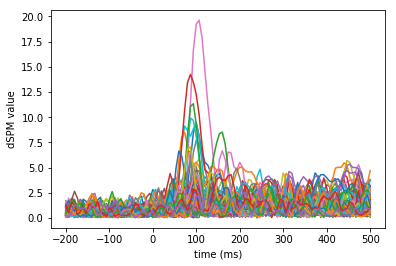

In [57]:
plt.figure()
plt.plot(1e3 * stc.times, stc.data[::100, :].T)
plt.xlabel('time (ms)')
plt.ylabel('%s value' % method)
plt.show()

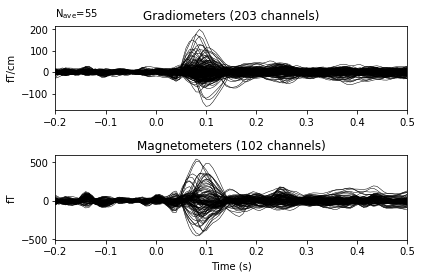

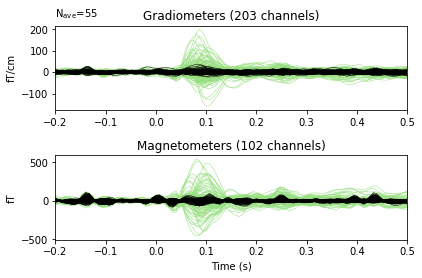

In [60]:
fig, axes = plt.subplots(2, 1)
evoked.plot(axes=axes)
for ax in axes:
    ax.texts = []
    for line in ax.lines:
        line.set_color('#98df81')
residual.plot(axes=axes)

In [63]:
vertno_max, time_max = stc.get_peak(hemi='rh')


subjects_dir = data_path + '/subjects'

surfer_kwargs = dict(
    hemi='rh',
    subjects_dir=subjects_dir,
    clim=dict(kind='value', lims=[8, 12, 15]),
    views='lateral',
    initial_time=time_max,
    time_unit='s', size=(800, 800), smoothing_steps=5)

brain = stc.plot(**surfer_kwargs)
brain.add_foci(vertno_max, coords_as_verts=True, hemi='rh', color='blue',
               scale_factor=0.6, alpha=0.5)
brain.add_text(0.1, 0.9, 'dSPM (plus location of maximal activation)', 'title',
               font_size=14)

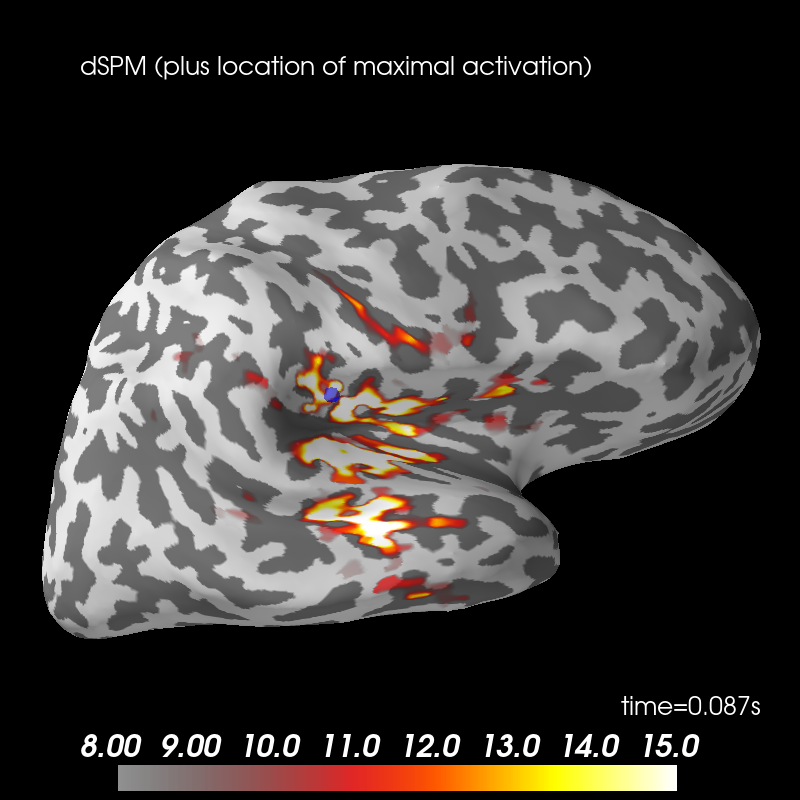

In [62]:
brain.save_image('dspm.png')
Image(filename='dspm.png', width=600)